LOADING PACKAGES

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

LOADING DATA

In [41]:
train_data=pd.read_csv('Train.csv')
print(train_data.head())
test_data =pd.read_csv('Test.csv')
test_data.head()

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


HYPOTHESIS

In [42]:
#Outlet_Establishment_Year has a positive effect on Item Outlet Sales
group1 = train_data[train_data['Item_Outlet_Sales'] > 0]['Outlet_Establishment_Year']
group2 = train_data[train_data['Item_Outlet_Sales'] == 0]['Outlet_Establishment_Year']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

if p_value < 0.05:
    print("Hypothesis is supported.")
else:
    print("Hypothesis is not supported.")

Hypothesis is not supported.


DATA STRUCTURE

In [43]:
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


DATA CONTENT

In [44]:
print(train_data.describe())
print(test_data.describe())
print(train_data.info())
print(test_data.info())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
       Item_Weight  Item_Visibility     Item_

UNIVARIATE ANALYSIS

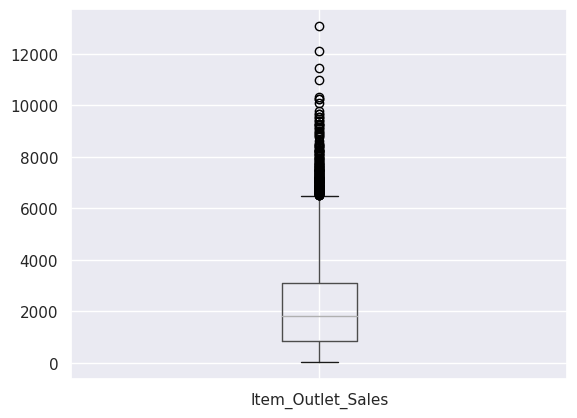

In [45]:
# Plotting the box plot target variables of given train data
boxplot_target = train_data.boxplot(column=['Item_Outlet_Sales'])

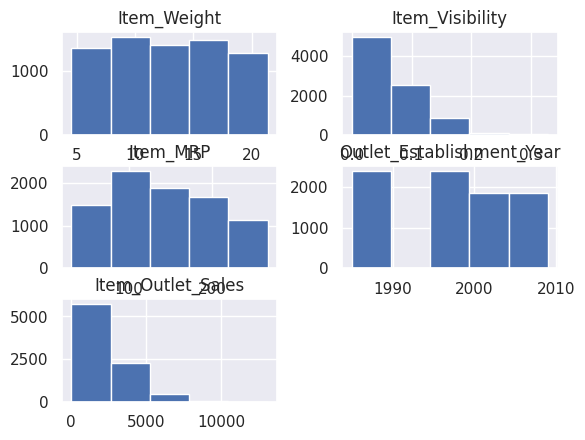

In [46]:
# Plotting Histogram for attributes in train data
hist = train_data.hist(bins=5)

COMBINING TRAIN DATA AND TEST DATA ATTRIBUTES FOR ANALYSIS

(14204, 11)
        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year
count  11765.000000     14204.000000  14204.000000               14204.000000
mean      12.792854         0.065953    141.004977                1997.830681
std        4.652502         0.051459     62.086938                   8.371664
min        4.555000         0.000000     31.290000                1985.000000
25%        8.710000         0.027036     94.012000                1987.000000
50%       12.600000         0.054021    142.247000                1999.000000
75%       16.750000         0.094037    185.855600                2004.000000
max       21.350000         0.328391    266.888400                2009.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item

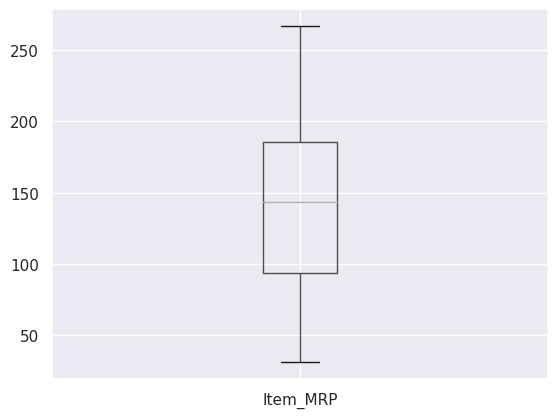

In [47]:
# Combining Attribute data from test and train
train_target = train_data.iloc[:,-1]
train_attributes = train_data.iloc[:,:-1]
data = pd.concat([train_attributes, test_data], ignore_index=True)

# Structure and content of data
print(data.shape)
print(data.describe())
print(data.info())

#analysing data
# Plotting the box plot target variables of given train data
boxplot_target = train_data.boxplot(column=['Item_MRP'])


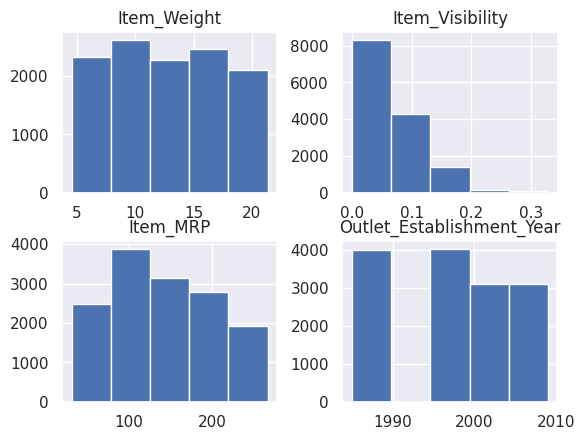

In [48]:
hist = data.hist(bins=5)

<ipython-input-49-30308b619511>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Item_Weight'], shade=True)


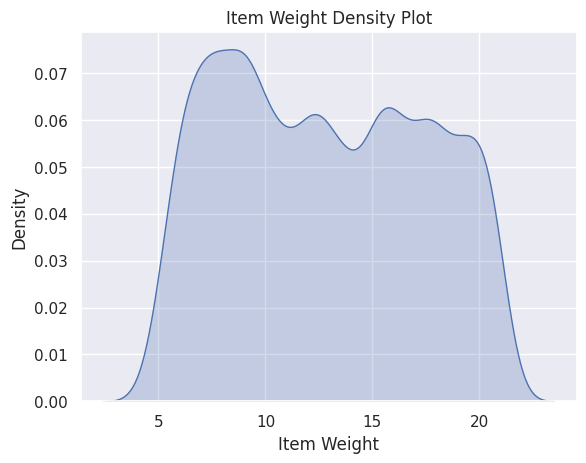

In [49]:
sns.kdeplot(data['Item_Weight'], shade=True)
plt.title('Item Weight Density Plot')
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Item MRP')

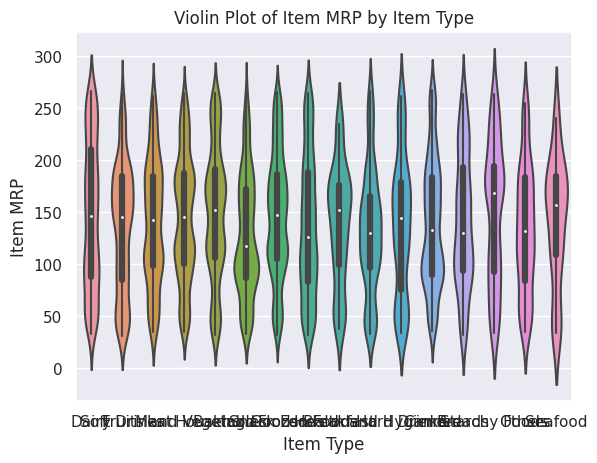

In [50]:
sns.violinplot(x=data['Item_Type'], y=data['Item_MRP'], data=data)
plt.title('Violin Plot of Item MRP by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item MRP')

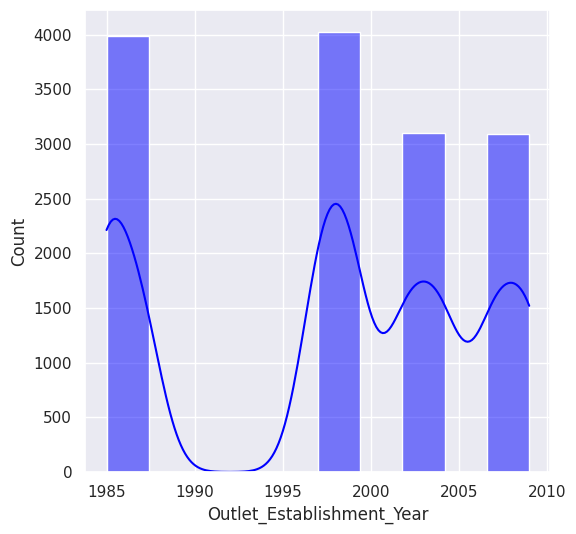

In [51]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['Outlet_Establishment_Year'],bins=10, kde=True, color='blue')
plt.show()

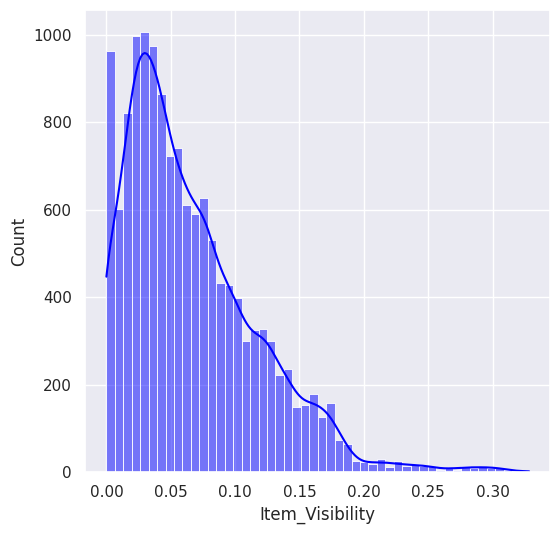

In [52]:
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Visibility'],bins=50, kde=True, color='blue')
plt.show()

BIVARIATE ANALYSIS

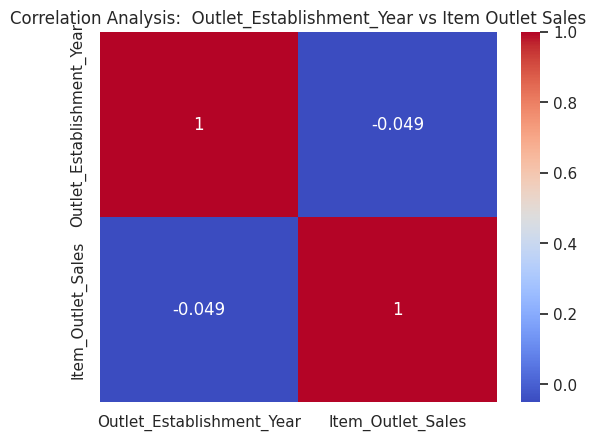

In [53]:
correlation_matrix = train_data[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis:  Outlet_Establishment_Year vs Item Outlet Sales')
plt.show()


<ipython-input-54-2abd735e699d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="Blues", annot=True,annot_kws={"fontsize":8})


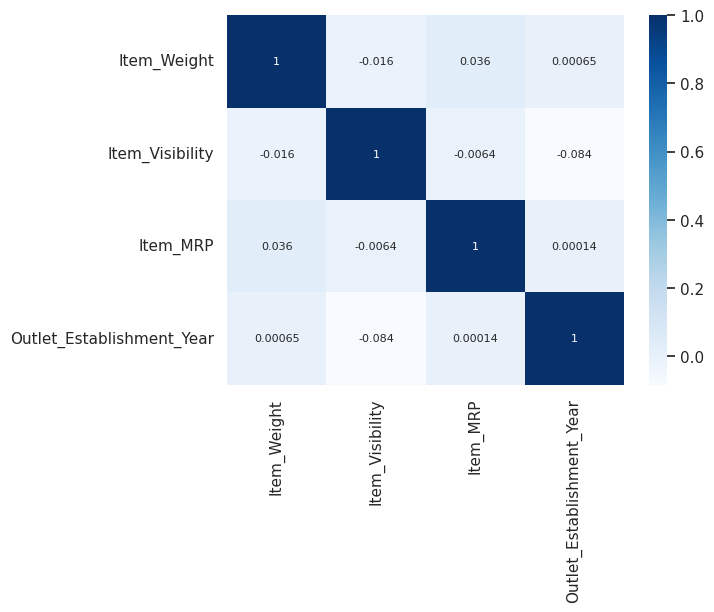

In [54]:
dataplot = sns.heatmap(data.corr(), cmap="Blues", annot=True,annot_kws={"fontsize":8})

PRE-PROCESSING

In [55]:
# Checking for NULL values
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [56]:
# Filling Null values of Item_Weight with mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# # Filling Null values of Outlet_Size with mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [57]:
# Checking for NULL values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

OUTLIERS

<Axes: >

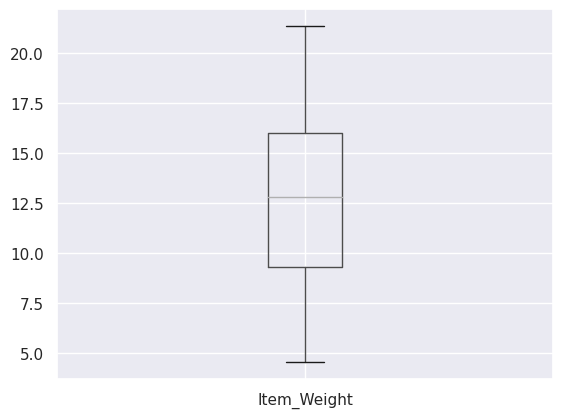

In [58]:
# Checking for Outliers in "Item_Weights"
data.boxplot(column=["Item_Weight"])

ENCODERS

In [59]:
# Normalisation and Scaling of Numerical values
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [60]:
# Label Encoding Of Categorical Data
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

FEATURE ENGINEERING

In [61]:
 # numerical
data['Item_ID_Category'] = data['Item_Identifier'].str[:2]
data.drop('Item_Identifier',axis=1, inplace=True)

data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']
data.drop('Outlet_Establishment_Year', axis = 1, inplace=True)

# categorical
category_mapping = {
    'Dairy': 'Food',
    'Soft Drinks': 'Beverages',
    'Meat': 'Food',
    'Fruits and Vegetables': 'Food',
    'Household': 'Non-Food',
}
data['Item_Category'] = data['Item_Type'].map(category_mapping)
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

data_encoded = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])

data.drop('Item_ID_Category', axis=1, inplace=True)
data.drop('Item_Category', axis = 1, inplace = True)
data.drop('Outlet_Identifier', axis=1, inplace=True)


In [62]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0.282525,1,0.048866,4,0.927507,1,0,1,24
1,0.081274,2,0.058705,14,0.072068,1,2,2,14
2,0.770765,1,0.051037,10,0.468288,1,0,1,24
3,0.871986,2,0.000000,6,0.640093,1,2,0,25
4,0.260494,1,0.000000,9,0.095805,0,2,1,36
...,...,...,...,...,...,...,...,...,...
14199,0.353974,2,0.041099,13,0.467004,2,0,1,26
14200,0.181304,2,0.435429,15,0.585126,1,2,2,14
14201,0.324204,1,0.223906,8,0.371199,1,1,1,21
14202,0.639774,2,0.000000,3,0.778154,1,1,1,16


DIVIDING THE DATASETS INTO TEST AND TRAIN

In [63]:
train = data.iloc[:8523]
test = data.iloc[8523:]

MODEL TRAINING

In [64]:
# Initialising Models
Linear_Regression_Model = LinearRegression()
Regularised_Linear_Regression_model = Ridge(alpha=0.5)
Random_Forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
XG_Boost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [65]:
# Model trainings
train = np.array(train)
test = np.array(test)
train_target = np.array(train_target)
print(train)
Linear_Regression_Model.fit(train,train_target)
Regularised_Linear_Regression_model.fit(train,train_target)
Random_Forest_model.fit(train,train_target)
XG_Boost_model.fit(train,train_target)

[[ 0.28252456  1.          0.04886645 ...  0.          1.
  24.        ]
 [ 0.08127419  2.          0.05870508 ...  2.          2.
  14.        ]
 [ 0.77076511  1.          0.05103696 ...  0.          1.
  24.        ]
 ...
 [ 0.35992855  1.          0.10714751 ...  1.          1.
  19.        ]
 [ 0.15808276  2.          0.44221878 ...  2.          2.
  14.        ]
 [ 0.61000298  1.          0.13666114 ...  0.          1.
  26.        ]]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
# Train test split for Accuracies of different Models
x_train, x_test, y_train, y_test = train_test_split(train, train_target, test_size=0.33, random_state=42)

# Predicting for dummy test data
Linear_Regression_model_y_pred = Linear_Regression_Model.predict(x_test)
Regularised_Linear_Regression_model_y_pred= Regularised_Linear_Regression_model.predict(x_test)
Random_Forest_model_y_pred= Random_Forest_model.predict(x_test)
XG_Boost_model_y_pred= XG_Boost_model.predict(x_test)

# Calculating accuracies of Each Model
print('Accuracies : \n')
print("Linear Regreesion model",Linear_Regression_Model.score(x_test,y_test))
print("Regularised Linear Regression model",Regularised_Linear_Regression_model.score(x_test,y_test))
print("Random Forest model",Random_Forest_model.score(x_test,y_test))
print("XG_Boost_model",XG_Boost_model.score(x_test,y_test))

# Calculating R-squared score
print('R squared : \n')
print("Linear Regreesion model",r2_score(y_test, Linear_Regression_model_y_pred))
print("Regularised Linear Regression model",r2_score(y_test, Regularised_Linear_Regression_model_y_pred))
print("Random Forest model",r2_score(y_test, Random_Forest_model_y_pred))
print("XG_Boost_model",r2_score(y_test, XG_Boost_model_y_pred))

# Calculating Mean-sqared error
print('R squared : \n')
print("Linear Regreesion model",mean_squared_error(y_test, Linear_Regression_model_y_pred))
print("Regularised Linear Regression model",mean_squared_error(y_test, Regularised_Linear_Regression_model_y_pred))
print("Random Forest model",mean_squared_error(y_test, Random_Forest_model_y_pred))
print("XG Boost model",mean_squared_error(y_test, XG_Boost_model_y_pred))


Accuracies : 

Linear Regreesion model 0.5108174486233099
Regularised Linear Regression model 0.5108413676914401
Random Forest model 0.9388016175463803
XG_Boost_model 0.8418459626085127
R squared : 

Linear Regreesion model 0.5108174486233099
Regularised Linear Regression model 0.5108413676914401
Random Forest model 0.9388016175463803
XG_Boost_model 0.8418459626085127
R squared : 

Linear Regreesion model 1371044.7649102684
Regularised Linear Regression model 1370977.726310774
Random Forest model 171522.31134957427
XG Boost model 443262.46797803056


In [67]:
# Predicting actual vales for the actual test set


Linear_Regression_Model_y_pred = Linear_Regression_Model.predict(test)
Regularised_Linear_Regression_model_y_pred= Regularised_Linear_Regression_model.predict(test)
Random_Forest_model_y_pred= Random_Forest_model.predict(test)
XG_Boost_model_y_pred= XG_Boost_model.predict(test)

result = np.column_stack((Linear_Regression_Model_y_pred, Regularised_Linear_Regression_model_y_pred, Random_Forest_model_y_pred, XG_Boost_model_y_pred))